In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import warnings


In [20]:
df3 = pd.read_csv('train.csv')
df3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df3 = df3.drop(['Alley', 'PoolQC', 'Fence','MiscFeature','LotFrontage', 'FireplaceQu' ], axis = 1)
df3 = df3.dropna()

In [22]:
Y = df3["SalePrice"]
X = df3[["LotArea", "PoolArea", "OverallQual","YearRemodAdd","YearBuilt"]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Eğtim gözlem sayısı: {}'.format(X_train.shape[0]))
print('Test gözlem sayısı: {}'.format(X_test.shape[0]))

Eğtim gözlem sayısı: 1070
Test gözlem sayısı: 268


In [24]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     469.5
Date:                Tue, 21 May 2019   Prob (F-statistic):          3.50e-266
Time:                        19:54:21   Log-Likelihood:                -12945.
No. Observations:                1070   AIC:                         2.590e+04
Df Residuals:                    1064   BIC:                         2.593e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.006e+06    1.6e+05     -6.273      0.000   -1.32e+06   -6.91e+05
LotArea          1.4950      0.125     11.943      0.000       1.249       1.741
PoolArea        30.6654     32.329      0.949      0.343     -32.771      94.102
OverallQual   4.165e+04   1302.357     31.977      0.000    3.91e+04    4.42e+04
YearRemodAdd   316.3687     87.683      3.608      0.000     144.318     488.420
YearBuilt      146.5964     61.244      2.394      0.017      26.424     266.769
==============================================================================
Omnibus:                      410.076   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4153.585
Skew:                           1.468   Prob(JB):                         0.00
Kurtosis:                      12.195   Cond. No.                     1.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

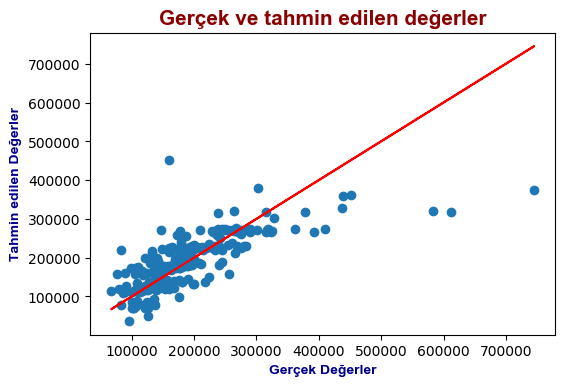

Ortalama Mutlak Hata (MAE)        : 35193.64425363294
Ortalama Kare Hata (MSE)          : 3039753215.031241
Kök Ortalama Kare Hata (RMSE)     : 55133.957005018616
Ortalama Mutlak Yüzde Hata (MAPE) : 20.092555881827767


In [25]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [26]:
Y = df3["SalePrice"]
df3["OQ_YRA"] = df3["OverallQual"] * df3["YearRemodAdd"]
X = df3[["LotArea", "PoolArea", "OverallQual","YearRemodAdd","YearBuilt","OQ_YRA"]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1070
Test kümesindeki gözlem sayısı   : 268


In [28]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     429.2
Date:                Tue, 21 May 2019   Prob (F-statistic):          6.70e-280
Time:                        19:54:23   Log-Likelihood:                -12910.
No. Observations:                1070   AIC:                         2.583e+04
Df Residuals:                    1063   BIC:                         2.587e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.626e+06   6.82e+05      6.781      0.000    3.29e+06    5.96e+06
LotArea          1.5187      0.121     12.527      0.000       1.281       1.757
PoolArea        43.5782     31.341      1.390      0.165     -17.919     105.075
OverallQual  -9.378e+05   1.16e+05     -8.116      0.000   -1.16e+06   -7.11e+05
YearRemodAdd -2421.0673    333.888     -7.251      0.000   -3076.223   -1765.912
YearBuilt       52.1125     60.339      0.864      0.388     -66.285     170.510
OQ_YRA         491.9210     58.028      8.477      0.000     378.059     605.784
==============================================================================
Omnibus:                      397.943   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4931.849
Skew:                           1.349   Prob(JB):                         0.00
Kurtosis:                      13.166   Cond. No.                     9.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

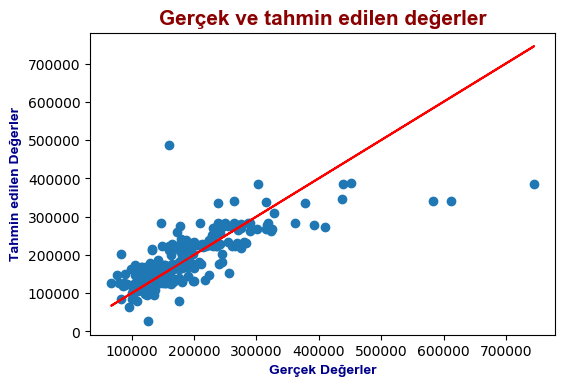

Ortalama Mutlak Hata (MSE)        : 32834.093977183016
Ortalama Kare Hata (MSE)          : 2857970848.885025
Kök Ortalama Kare Hata (RMSE)     : 53459.99297498107
Ortalama Mutlak Yüzde Hata (MAPE) : 18.315080691098167


In [29]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Yeni eklenen etkileşim ile birlikte MSE , RMSE ve MAPE'de bir azalma olmuşken ortalama kare hatada ufak da olsa bir artış yaşanmıştır.

Model 2 model 1'e göre daha iyi durumdadır.

İki model de düşük değerleri tahmin etmede daha iyi durumdadır.Fakat yüksek değerlerin tahmininde pek başarılı modeller değillerdir.